In [20]:
%pip install pandas
%pip install openpyxl
%pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [21]:
data = pd.read_excel('../unzipped_shp_and_shx_shape_files/cleaned_export.xlsx', na_values=".")

In [25]:
data2 = data[['fips', 'population', 'intersects_per_road_length', 'population_density']]


In [26]:
data2

,fips,population,intersects_per_road_length,population_density
0,48301,64,1.611072,0.036947
1,15005,82,6.968886,2.640255
2,48269,265,1.670830,0.112329
3,48261,350,1.608964,0.092650
4,31117,399,0.637138,0.179289
...,...,...,...,...
3138,6073,3298634,3.449335,302.500992
3139,4013,4420568,4.128898,185.480108
3140,48201,4731145,3.749584,1070.117372
3141,17031,5275541,5.143695,2155.620127


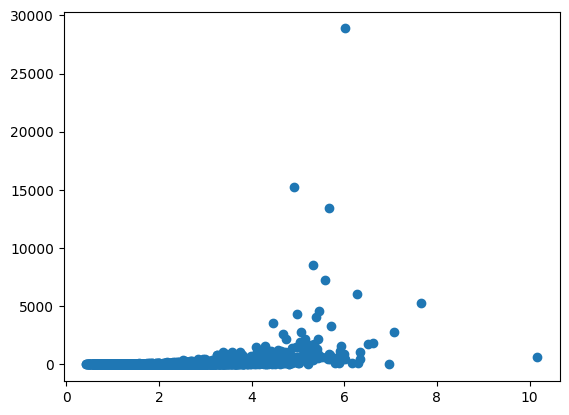

In [29]:
# Generate data...
x = data2['intersects_per_road_length']
y = data2['population_density']
c = data2['population']
# Plot...
plt.scatter(x, y)
plt.gray()

plt.show()